# Problem set 4


[Jovana Ramos]

[Identifying Heteroskedasticity] 

[4/1/2020]
tracks the lesson plan of today variance and erros herestaskitikt 
increasing by loggin

In [30]:
clear
cd C:\Users\Jovis\Desktop\SOC_211 
capture log close
*log using Assignment_4.log
set more off
use GSS2018w7, clear



C:\Users\Jovis\Desktop\SOC_211





## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.
Most of the data is concentrated at the left of the graph. There are gaps between the concentrated data and the rest of the data. It is difficult to decide how much of the expansion is due to variation.

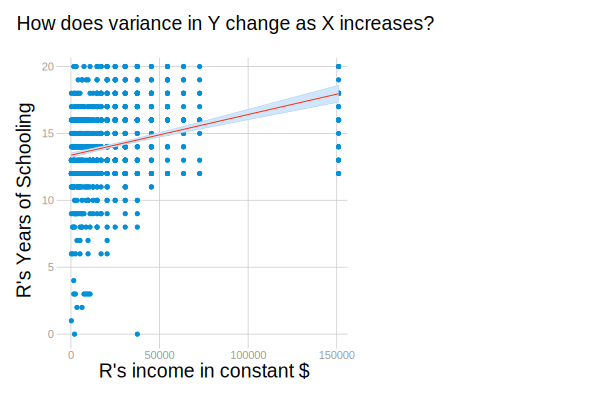

In [31]:
*Respondent's Years of Schooling and Income
tw (scatter educ realrinc) ///
(lfitci educ realrinc),  ///
ytitle(R's Years of Schooling, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("How does variance in Y change as X increases?" " ", span size(large)) ///
aspect(1, place(west))

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?
Logging helps reduce heteroscedasticity because it increase our chi to 59.30 compare to 1.87 when educ is not logged.    

In [3]:
quietly regress educ realrinc 
estat hettest




Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of educ

         chi2(1)      =     1.87
         Prob > chi2  =   0.1711


In [4]:
gen educln=log(educ)


quietly regress educln realrinc
estat hettest


(7 missing values generated)



Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of educln

         chi2(1)      =    59.30
         Prob > chi2  =   0.0000


## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.
For regression without bootstrap the standard error is 0. In addition, when bootstrap is added the standard error is also 0.  The standard error is the same.

In [34]:
*A.regression
est clear
quietly reg educ realrinc
quietly eststo

In [35]:
*B. regression without bootstrapped
quietly bootstrap _b[realrinc] , rep(1000) nodots : ///
   reg educ realrinc
quietly eststo

In [36]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) 

This front-end or document format cannot display HTML

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.
The robust standard errors are also the same compared to the other two procedures.

In [32]:
quietly reg educ realrinc, robust
quietly eststo

In [33]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) 

This front-end or document format cannot display HTML

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
My standard error has been 0 so far and therefore I decided to estimate my model with cluster robust standard errors.
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
I was able to re-estimate my model with cluster robust standard errors and I still have 0’s. On the other had my N did go down by more than 200 participants.  
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.

write a coupole of methods for the methods of model



[code here]they are not needed for clustering for why why not should be 
why is the cluster and why it si 

being clustered in a company may reduce vrianbce for colleges in the DV 
than if we dont have a lot of companies the clustering is making lower than what we couldpredict for other companies or for other compies or futur for -porfit colleges

In [28]:
qui reg educ realrinc, cluster(PASEI10)
quietly eststo

In [29]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap" "Robust" "Cluster") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) legend

This front-end or document format cannot display HTML